In [10]:
import re
import pandas as pd

In [11]:
# read data
df = pd.read_csv('df_combined.csv')
df['title'].head()

0    Contrastive autoencoder for anomaly detection ...
1    Detection of abnormality in wireless capsule e...
2      Single image dehazing using a new color channel
3    Estimating Tukey depth using incremental quant...
4    Advanced Passive Operating System Fingerprinti...
Name: title, dtype: object

In [12]:
df = df.fillna('missing')
df.head()

,title,authors,year_published,number,volume,journal,type,content,doi,file
0,Contrastive autoencoder for anomaly detection ...,Hao Zhou and Ke Yu and Xuan Zhang and Guanlin ...,2022,missing,610,Information Sciences,article,Contrastive autoencoder for anomaly detection ...,https://doi.org/10.1016/j.ins.2022.07.179,doc16
1,Detection of abnormality in wireless capsule e...,Samir Jain and Ayan Seal and Aparajita Ojha an...,2020,missing,127,Computers in Biology and Medicine,article,Computers in Biology and Medicine 127 (2020) 1...,https://doi.org/10.1016/j.compbiomed.2020.104094,doc17
2,Single image dehazing using a new color channel,Geet Sahu and Ayan Seal and Ondrej Krejcar and...,2021,missing,74,Journal of Visual Communication and Image Repr...,article,J. Vis. Commun. Image R. 74 (2021) 103008\nAva...,https://doi.org/10.1016/j.jvcir.2020.103008,doc15
3,Estimating Tukey depth using incremental quant...,Hugo L. Hammer and Anis Yazidi and Håvard Rue,2022,missing,122,Pattern Recognition,article,Pattern Recognition 122 (2022) 108339 \nConten...,https://doi.org/10.1016/j.patcog.2021.108339,doc29
4,Advanced Passive Operating System Fingerprinti...,"Hagos, Desta Haileselassie and Løland, Martin ...",2020,missing,missing,missing,inproceedings,Advanced Passive Operating System Fingerprinti...,10.1109/ICCCN49398.2020.9209694,doc28


In [13]:
df['content'].str.contains(r'(?i)\bmethodology\b', regex=True)


0      True
1      True
2     False
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13     True
14     True
15    False
16     True
17    False
18     True
19    False
20    False
21    False
22    False
23     True
24     True
25     True
26     True
27     True
28    False
29     True
30     True
31    False
32     True
33     True
34     True
35    False
36     True
Name: content, dtype: bool

In [14]:
# Function to extract the abstract
def extract_abstract(text):
    match = re.search(r'(?i)\babstract\b(.*?)(?=\b(introduction|keywords|1\.|I\.)\b|$)', text, re.DOTALL)
    return match.group(1).strip() if match else None

# Keep only documents that have an abstract
df = df[df['content'].str.contains(r'(?i)\babstract\b', regex=True)].copy()

# Extract the abstract
df['abstract'] = df['content'].apply(extract_abstract)

# Remove the abstract from the content column
df['content'] = df.apply(lambda row: row['content'].replace(row['abstract'], '', 1) if row['abstract'] else row['content'], axis=1)
df

,title,authors,year_published,number,volume,journal,type,content,doi,file,abstract
4,Advanced Passive Operating System Fingerprinti...,"Hagos, Desta Haileselassie and Løland, Martin ...",2020,missing,missing,missing,inproceedings,Advanced Passive Operating System Fingerprinti...,10.1109/ICCCN49398.2020.9209694,doc28,"—Securing and managing large, complex enterpri..."
5,Artificial intelligence in the fertility clini...,"Riegler, M A and Stensen, M H and Witczak, O a...",2021,9.0,36,Human Reproduction,article,.................................................,10.1093/humrep/deab168,doc14,": In recent years, the amount of data produced..."
6,EvoDynamic: A Framework for the Evolution of G...,"Pontes-Filho, Sidney\nand Lind, Pedro\nand Yaz...",2020,missing,missing,missing,inproceedings,EvoDynamic: a framework for the evolution of\n...,missing,doc10,. Dynamical systems possess a computational ca...
7,A general representation of dynamical systems ...,Sidney Pontes{-}Filho and\nAnis Yazidi and\nJi...,2019,missing,abs/1907.01856,CoRR,article,A general representation of dynamical systems ...,missing,doc11,—Dynamical systems are capable of performing c...
9,Exploring Multilingual Word Embedding Alignmen...,"Aaby, Pernille\nand Biermann, Daniel\nand Yazi...",2023,missing,missing,missing,inproceedings,"\n \n \n \nAccepted manuscript \nAaby, P., Bi...",missing,doc12,". Contextual language models, such as transfor..."
10,A Deep Learning-Based Tool for Automatic Brain...,"Pontes-Filho, Sidney\nand Dahl, Annelene Gulde...",2022,missing,missing,missing,inproceedings,A deep learning based tool for automatic brain...,missing,doc9,—Removing skull artifacts from functional magn...
15,Genetic Algorithms For Tightening Security,"Palumbo, Fabrizio and Buji, Adam and Yazidi, A...",2022,missing,missing,missing,inproceedings,Genetic Algorithms For Tightening Security\n1s...,10.23919/WMNC56391.2022.9954297,doc7,—Proper conﬁguration of operating systems and ...
16,How (not to) Run an AI Project in Investigativ...,"M. Fridman, R. Krøvel and F. Palumbo",2023,0.0,0,Journalism Practice,article,Journalism Practice\nISSN: (Print) (Online) Jo...,10.1080/17512786.2023.2253797,doc3,Data journalists are increasingly reliant on a...
22,A New Adaptive Mixture Distance-Based Improved...,"Sharma, Krishna Kumar and Seal, Ayan and Yazid...",2022,missing,71,IEEE Transactions on Instrumentation and Measu...,article,IEEE TRANSACTIONS ON INSTRUMENTATION AND MEASU...,10.1109/TIM.2022.3216366,doc22,—With the rapid development of sensors and mec...
23,A sensitivity analysis of cellular automata an...,"Tom Eivind Glover, Ruben Jahren, Francesco Mar...",2025,1.0,40,"International Journal of Parallel, Emergent an...",article,"International Journal of Parallel, Emergent an...",10.1080/17445760.2024.2396334,doc34,Elementary Cellular Automata (ECA) are well-st...


In [18]:
pd.set_option('display.max_colwidth', None)
df[['authors']]

,authors
4,"Hagos, Desta Haileselassie and Løland, Martin and Yazidi, Anis and Kure, Øivind and Engelstad, Paal E."
5,"Riegler, M A and Stensen, M H and Witczak, O and Andersen, J M and Hicks, S A and Hammer, H L and Delbarre, E and Halvorsen, P and Yazidi, A and Holst, N and Haugen, T B"
6,"Pontes-Filho, Sidney\nand Lind, Pedro\nand Yazidi, Anis\nand Zhang, Jianhua\nand Hammer, Hugo\nand Mello, Gustavo B. M.\nand Sandvig, Ioanna\nand Tufte, Gunnar\nand Nichele, Stefano"
7,Sidney Pontes{-}Filho and\nAnis Yazidi and\nJianhua Zhang and\nHugo Hammer and\nGustavo B. M. Mello and\nIoanna Sandvig and\nGunnar Tufte and\nStefano Nichele
9,"Aaby, Pernille\nand Biermann, Daniel\nand Yazidi, Anis\nand Mello, Gustavo Borges Moreno e.\nand Palumbo, Fabrizio"
10,"Pontes-Filho, Sidney\nand Dahl, Annelene Gulden\nand Nichele, Stefano\nand Mello, Gustavo Borges Moreno e."
15,"Palumbo, Fabrizio and Buji, Adam and Yazidi, Anis and Haugerud, Hårek"
16,"M. Fridman, R. Krøvel and F. Palumbo"
22,"Sharma, Krishna Kumar and Seal, Ayan and Yazidi, Anis and Krejcar, Ondrej"
23,"Tom Eivind Glover, Ruben Jahren, Francesco Martinuzzi, Pedro Gonçalves Lind and Stefano Nichele"


In [16]:
df['authors_list'] = df['authors'].apply(lambda x: x.split(" and "))
df

,title,authors,year_published,number,volume,journal,type,content,doi,file,abstract,authors_list
4,Advanced Passive Operating System Fingerprinti...,"Hagos, Desta Haileselassie and Løland, Martin ...",2020,missing,missing,missing,inproceedings,Advanced Passive Operating System Fingerprinti...,10.1109/ICCCN49398.2020.9209694,doc28,"—Securing and managing large, complex enterpri...","[Hagos, Desta Haileselassie, Løland, Martin, Y..."
5,Artificial intelligence in the fertility clini...,"Riegler, M A and Stensen, M H and Witczak, O a...",2021,9.0,36,Human Reproduction,article,.................................................,10.1093/humrep/deab168,doc14,": In recent years, the amount of data produced...","[Riegler, M A, Stensen, M H, Witczak, O, Ander..."
6,EvoDynamic: A Framework for the Evolution of G...,"Pontes-Filho, Sidney\nand Lind, Pedro\nand Yaz...",2020,missing,missing,missing,inproceedings,EvoDynamic: a framework for the evolution of\n...,missing,doc10,. Dynamical systems possess a computational ca...,"[Pontes-Filho, Sidney\nand Lind, Pedro\nand Ya..."
7,A general representation of dynamical systems ...,Sidney Pontes{-}Filho and\nAnis Yazidi and\nJi...,2019,missing,abs/1907.01856,CoRR,article,A general representation of dynamical systems ...,missing,doc11,—Dynamical systems are capable of performing c...,[Sidney Pontes{-}Filho and\nAnis Yazidi and\nJ...
9,Exploring Multilingual Word Embedding Alignmen...,"Aaby, Pernille\nand Biermann, Daniel\nand Yazi...",2023,missing,missing,missing,inproceedings,"\n \n \n \nAccepted manuscript \nAaby, P., Bi...",missing,doc12,". Contextual language models, such as transfor...","[Aaby, Pernille\nand Biermann, Daniel\nand Yaz..."
10,A Deep Learning-Based Tool for Automatic Brain...,"Pontes-Filho, Sidney\nand Dahl, Annelene Gulde...",2022,missing,missing,missing,inproceedings,A deep learning based tool for automatic brain...,missing,doc9,—Removing skull artifacts from functional magn...,"[Pontes-Filho, Sidney\nand Dahl, Annelene Guld..."
15,Genetic Algorithms For Tightening Security,"Palumbo, Fabrizio and Buji, Adam and Yazidi, A...",2022,missing,missing,missing,inproceedings,Genetic Algorithms For Tightening Security\n1s...,10.23919/WMNC56391.2022.9954297,doc7,—Proper conﬁguration of operating systems and ...,"[Palumbo, Fabrizio, Buji, Adam, Yazidi, Anis, ..."
16,How (not to) Run an AI Project in Investigativ...,"M. Fridman, R. Krøvel and F. Palumbo",2023,0.0,0,Journalism Practice,article,Journalism Practice\nISSN: (Print) (Online) Jo...,10.1080/17512786.2023.2253797,doc3,Data journalists are increasingly reliant on a...,"[M. Fridman, R. Krøvel, F. Palumbo]"
22,A New Adaptive Mixture Distance-Based Improved...,"Sharma, Krishna Kumar and Seal, Ayan and Yazid...",2022,missing,71,IEEE Transactions on Instrumentation and Measu...,article,IEEE TRANSACTIONS ON INSTRUMENTATION AND MEASU...,10.1109/TIM.2022.3216366,doc22,—With the rapid development of sensors and mec...,"[Sharma, Krishna Kumar, Seal, Ayan, Yazidi, An..."
23,A sensitivity analysis of cellular automata an...,"Tom Eivind Glover, Ruben Jahren, Francesco Mar...",2025,1.0,40,"International Journal of Parallel, Emergent an...",article,"International Journal of Parallel, Emergent an...",10.1080/17445760.2024.2396334,doc34,Elementary Cellular Automata (ECA) are well-st...,"[Tom Eivind Glover, Ruben Jahren, Francesco Ma..."


In [17]:
df[['authors_list']]

,authors_list
4,"[Hagos, Desta Haileselassie, Løland, Martin, Y..."
5,"[Riegler, M A, Stensen, M H, Witczak, O, Ander..."
6,"[Pontes-Filho, Sidney\nand Lind, Pedro\nand Ya..."
7,[Sidney Pontes{-}Filho and\nAnis Yazidi and\nJ...
9,"[Aaby, Pernille\nand Biermann, Daniel\nand Yaz..."
10,"[Pontes-Filho, Sidney\nand Dahl, Annelene Guld..."
15,"[Palumbo, Fabrizio, Buji, Adam, Yazidi, Anis, ..."
16,"[M. Fridman, R. Krøvel, F. Palumbo]"
22,"[Sharma, Krishna Kumar, Seal, Ayan, Yazidi, An..."
23,"[Tom Eivind Glover, Ruben Jahren, Francesco Ma..."


In [10]:
!pip install networkx

In [16]:
!pip install nameparser


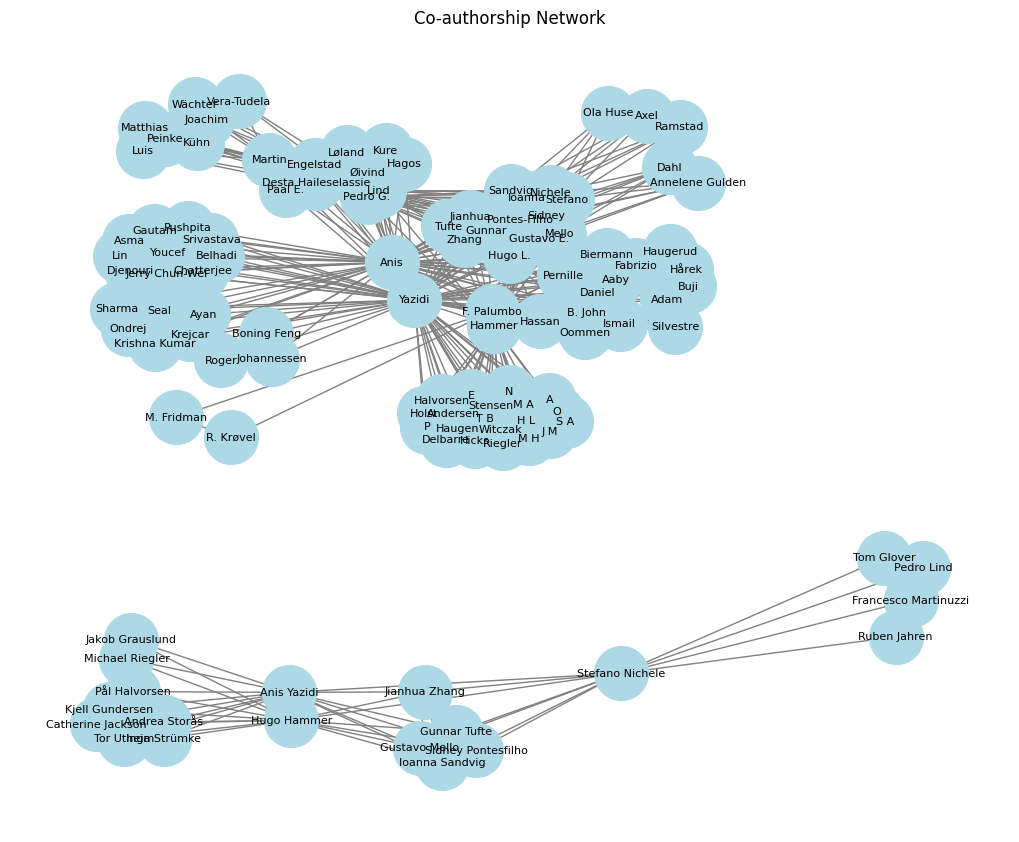

In [19]:
from collections import defaultdict


# Step 1: Clean and Normalize Author Names
def clean_and_normalize_authors(authors):
    # Replace variations of 'and' and remove special characters
    authors = re.sub(r'\s*\n*\band\b\s*', ',', authors)
    authors = re.sub(r'\{-\}', '', authors)  # Remove special formatting
    author_list = [author.strip() for author in authors.split(',') if author.strip()]

    # Normalize names to "First Last" format
    normalized_names = []
    for name in author_list:
        parsed_name = HumanName(name)
        full_name = f"{parsed_name.first} {parsed_name.last}".strip()
        full_name = full_name.title()  # Ensure consistent casing
        normalized_names.append(full_name)

    return list(set(normalized_names))  # Remove duplicates

df['authors_list'] = df['authors'].apply(clean_and_normalize_authors)

# Step 2: Detect Initials & Expand Names
name_variants = defaultdict(set)

# Build a mapping of name variants (initials vs full name)
for authors in df['authors_list']:
    for name in authors:
        key = re.sub(r'\b[A-Z]\.', '', name).strip()  # Remove initials
        name_variants[key].add(name)

# Merge initials into full names
name_mapping = {}
for base_name, variants in name_variants.items():
    full_names = [n for n in variants if len(n.split()) > 1]  # Find full names
    if full_names:
        correct_name = full_names[0]  # Choose the first full name found
        for variant in variants:
            name_mapping[variant] = correct_name

# Step 3: Apply the name mapping
def unify_names(authors):
    return [name_mapping.get(name, name) for name in authors]

df['authors_list'] = df['authors_list'].apply(unify_names)

# Step 4: Create a co-authorship graph
G = nx.Graph()

for authors in df['authors_list']:
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):  # Avoid self-loops
            G.add_edge(authors[i], authors[j])

# Step 5: Improve visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)  # Adjust spacing
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=8)

plt.title("Co-authorship Network")
plt.show()

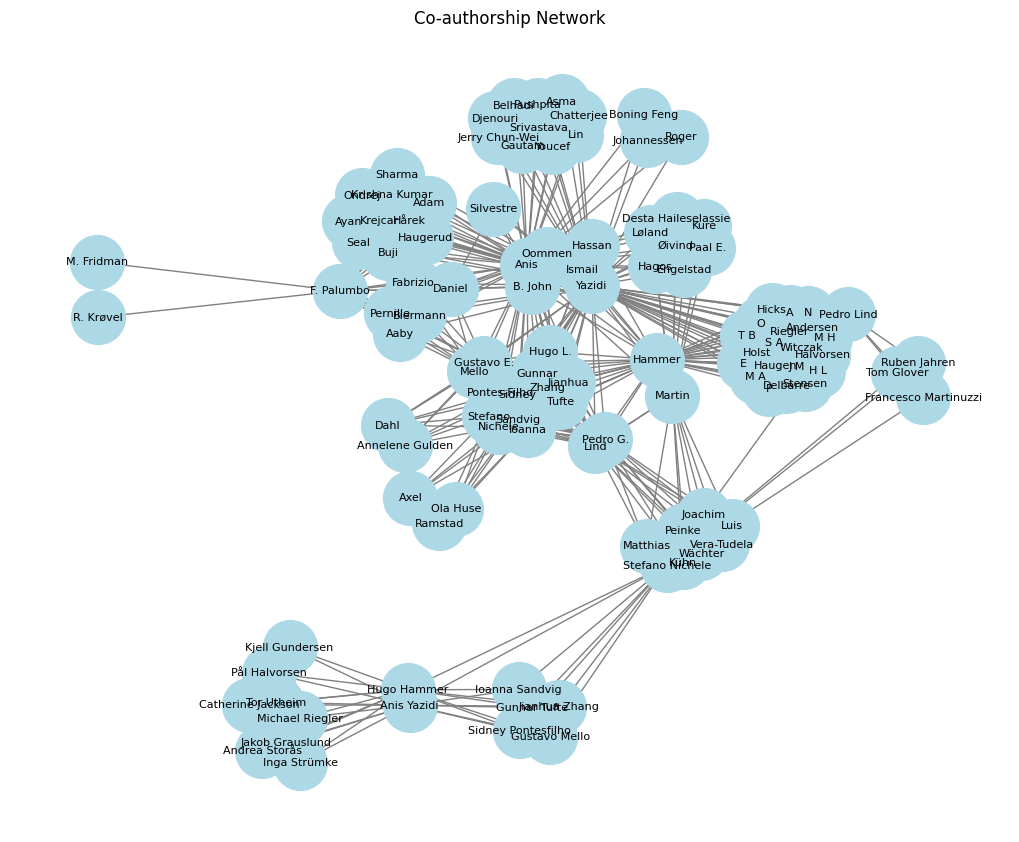

In [19]:
import re
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from nameparser import HumanName  # Assuming you have nameparser installed

# Step 1: Clean and Normalize Author Names
def clean_and_normalize_authors(authors):
    # Replace variations of 'and' and remove newline characters and special formatting
    authors = re.sub(r'\s*\n*\band\b\s*', ',', authors)  # Replace 'and' with commas
    authors = re.sub(r'\{-\}', '', authors)  # Remove special formatting
    authors = re.sub(r'\n', ', ', authors)  # Replace newlines with commas
    author_list = [author.strip() for author in authors.split(',') if author.strip()]

    # Normalize names to "First Last" format
    normalized_names = []
    for name in author_list:
        parsed_name = HumanName(name)
        full_name = f"{parsed_name.first} {parsed_name.last}".strip()
        full_name = full_name.title()  # Ensure consistent casing
        normalized_names.append(full_name)

    return list(set(normalized_names))  # Remove duplicates

df['authors_list'] = df['authors'].apply(clean_and_normalize_authors)

# Step 2: Detect Initials & Expand Names
name_variants = defaultdict(set)

# Build a mapping of name variants (initials vs full name)
for authors in df['authors_list']:
    for name in authors:
        key = re.sub(r'\b[A-Z]\.', '', name).strip()  # Remove initials
        name_variants[key].add(name)

# Merge initials into full names
name_mapping = {}
for base_name, variants in name_variants.items():
    full_names = [n for n in variants if len(n.split()) > 1]  # Find full names
    if full_names:
        correct_name = full_names[0]  # Choose the first full name found
        for variant in variants:
            name_mapping[variant] = correct_name

# Step 3: Apply the name mapping
def unify_names(authors):
    return [name_mapping.get(name, name) for name in authors]

df['authors_list'] = df['authors_list'].apply(unify_names)

# Step 4: Create a co-authorship graph
G = nx.Graph()

for authors in df['authors_list']:
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):  # Avoid self-loops
            G.add_edge(authors[i], authors[j])

# Step 5: Improve visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)  # Adjust spacing
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=8)

plt.title("Co-authorship Network")
plt.show()


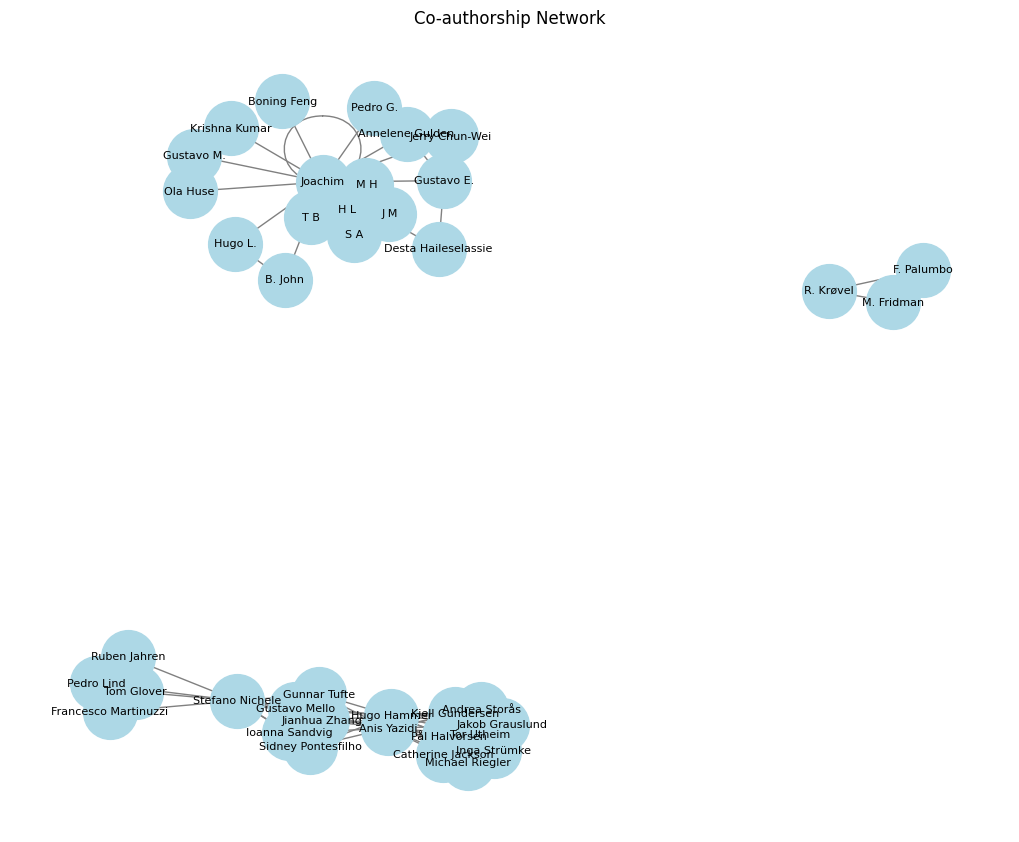

In [21]:
import re
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from nameparser import HumanName

# Step 1: Clean and Normalize Author Names
def clean_and_normalize_authors(authors):
    # Replace variations of 'and' and remove newline characters
    authors = re.sub(r'\s*\n*\band\b\s*', ',', authors)  # Replace 'and' with commas
    authors = re.sub(r'\{-\}', '', authors)  # Remove special formatting
    authors = re.sub(r'\n', ', ', authors)  # Replace newlines with commas
    author_list = [author.strip() for author in authors.split(',') if author.strip()]

    return author_list

df['authors_list'] = df['authors'].apply(clean_and_normalize_authors)

# Step 2: Create a Mapping of Full Names and Last Names
# Dictionary to hold the full names and last names as keys for mapping
name_mapping = {}

# Iterate through authors to populate the mapping
for authors in df['authors_list']:
    for author in authors:
        parsed_name = HumanName(author)
        full_name = f"{parsed_name.first} {parsed_name.last}".strip()
        full_name = full_name.title()  # Ensure consistent casing
        last_name = parsed_name.last.strip().title()

        # If a full name is available, store it in the mapping using last name
        if full_name:
            if last_name not in name_mapping:
                name_mapping[last_name] = full_name
            else:
                # If the last name already exists, ensure consistency by choosing the full name
                name_mapping[last_name] = full_name

# Step 3: Apply the name mapping to authors to replace last names with full names
def unify_names(authors):
    unified_authors = []
    for author in authors:
        parsed_name = HumanName(author)
        last_name = parsed_name.last.strip().title()
        # If we have a full name mapping, use it
        if last_name in name_mapping:
            unified_authors.append(name_mapping[last_name])
        else:
            unified_authors.append(author)
    return unified_authors

df['authors_list'] = df['authors_list'].apply(unify_names)

# Step 4: Create a co-authorship graph
G = nx.Graph()

# Add edges between authors for each co-authorship
for authors in df['authors_list']:
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):  # Avoid self-loops
            G.add_edge(authors[i], authors[j])

# Step 5: Improve visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)  # Adjust spacing
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=8)

plt.title("Co-authorship Network")
plt.show()


In [6]:
def clean_text(text):
    '''Cleans content column'''

    # remove journal homepage URLs
    text = re.sub(r'https?://\S+', '', text) 

    # remove ISSN numbers
    text = re.sub(r'ISSN:\s*\(.*?\)', '', text)

    # remove copyright/license info
    text = re.sub(r'©\s*\d{4}.*?license.*', '', text, flags=re.IGNORECASE)

    # remove unwanted "Downloaded from" lines or publication data
    text = re.sub(r'Downloaded from .+? on \w+ \d{2}, \d{4}', '', text)

    # remove any reference to URLs or links in text that aren’t essential
    text = re.sub(r'\bwww\.\S+', '', text) 

    # remove unwanted citations and references (vurder å fjerne dette)
    text = re.sub(r'REFERENCES AND NOTES.*', '', text, flags=re.DOTALL)  # remove references and notes section
    text = re.sub(r'\(\d+\)', '', text)  # remove inline citations 
    text = re.sub(r'\*\*P.*?Wilcoxon.*?\n', '', text)  # remove statistical results

    # normalize spaces and remove unwanted newlines
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [7]:
# apply cleaning
df["cleaned_content"] = df["content"].apply(clean_text)
df["cleaned_abstract"] = df["abstract"].apply(clean_text)

In [8]:
#pd.set_option('display.max_colwidth', None)
df[['cleaned_content']].head()

,cleaned_content
4,Advanced Passive Operating System Fingerprinti...
5,.................................................
6,EvoDynamic: a framework for the evolution of g...
7,A general representation of dynamical systems ...
9,"Accepted manuscript Aaby, P., Biermann, D., Ya..."


In [9]:
# save cleaned df to csv file
df.to_csv('df_cleaned.csv', index=False)